In [57]:
import numpy as np
from numpy import abs, arctan
from scipy.ndimage import rotate
from numpy.fft import fft2, fftshift, ifft2, fft, ifft
import genops
from matplotlib import pyplot as plt
genops.set_backend(genops.NUMPY)

In [58]:
x = genops.zeros([200, 200])
for i in np.arange(0, 6.28, 0.1):
    ca, cb = int(120 + 60 * np.cos(i)), int(100 + 10 * np.sin(i))
    x[ca - 1: ca + 1, cb - 1: cb + 1] = 1.0
    ca, cb = int(120 + 10 * np.cos(i)), int(100 + 30 * np.sin(i))
    x[ca - 1: ca + 1, cb - 1: cb + 1] = 1.0

def vis(x):
    plt.figure(figsize=(10, 3))
    fx = fftshift(fft2(x))
    plt.subplot(1, 3, 1)
    plt.imshow(x)
    plt.title("image")
    plt.subplot(1, 3, 2)
    plt.imshow(abs(fx))
    plt.title("amplitude")
    plt.subplot(1, 3, 3)
    plt.imshow(arctan(fx.imag / (fx.real + 1e-8)))
    plt.title("phase")

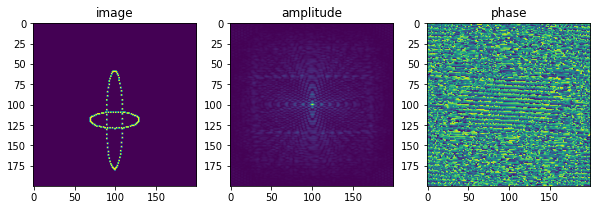

In [59]:
vis(x)

In [60]:
print((fft(fft(x, axis=0), axis=1) - fft2(x)).sum())
print((fft(fft(x, axis=1), axis=0) - fft2(x)).sum())

(-2.5174307083375425e-14-8.650208427427519e-13j)
0j


## Translation & Rotation

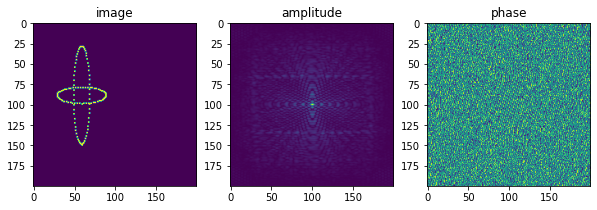

In [61]:
y = np.roll(x, (-30, -40), (0, 1))
vis(y)

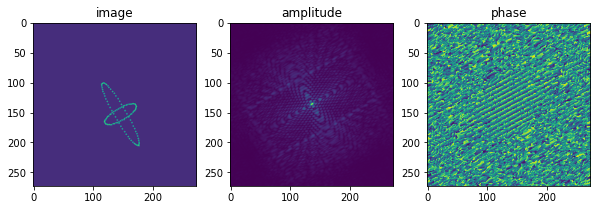

In [62]:
y = rotate(x, 30)
vis(y)

## Fourier Slice Theorem

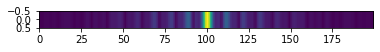

In [63]:
px = x.sum(0)
fpx = abs(fft(px))
plt.imshow(fftshift(fpx[np.newaxis, :]), aspect=10)

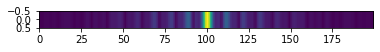

In [64]:
fx = abs(fft2(x))
plt.imshow(fftshift(fx[0, :][np.newaxis, :]), aspect=10)

## Rosolution Invariance

/Users/admin/opt/miniconda3/envs/mlvis/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/Users/admin/opt/miniconda3/envs/mlvis/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, '$\\hat{F}(I_2)$, crop 16x16')

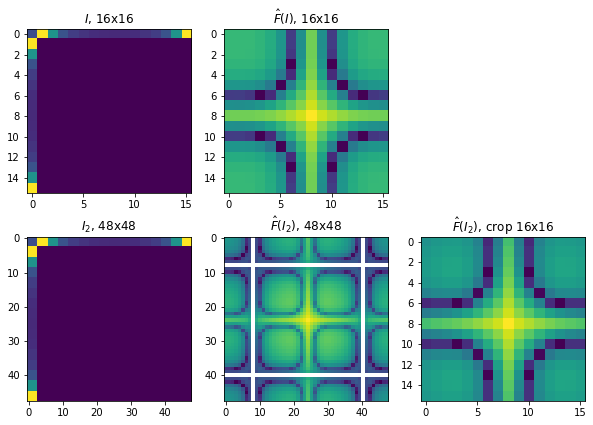

In [65]:
freq = np.sin(np.mgrid[-4:4:.5,-4:4:.5]).mean(0)
# freq = np.sin(np.mgrid[-4:4:.1,-4:4:.1]).mean(0)

X = np.abs(ifft2(freq))
D = len(X[0])
half = 1
total = half * 2 + 1
y = X.repeat(total).reshape(D, D * total).transpose().repeat(total).reshape(D * total, D * total).transpose()

# y = np.concatenate([X for _ in range(total)])
# y = np.concatenate([y for _ in range(total)], axis=1)

fx = fftshift(np.abs(fft2(X, norm="forward")))
fy = fftshift(np.abs(fft2(y, norm="forward"))) # [D: D+D, D: D+D]

plt.figure(figsize=(10, 7))

plt.subplot(2, 3, 1)
plt.imshow(X)
plt.title("$I$, 16x16")

plt.subplot(2, 3, 2)
plt.imshow(np.log(fx))
plt.title("$\hat{F}(I)$, 16x16")

plt.subplot(2, 3, 4)
plt.imshow(y)
plt.title("$I_2$, 48x48")

plt.subplot(2, 3, 5)
plt.imshow(np.log(fy))
plt.title("$\hat{F}(I_2)$, 48x48")

plt.subplot(2, 3, 6)
plt.imshow(np.log(fy)[D * half: D * half + D, D * half: D * half + D])
plt.title("$\hat{F}(I_2)$, crop 16x16")
